In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib.ticker import FuncFormatter
import os

rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Times New Roman'],'size':14})#,'weight':'bold'})
rc('xtick',**{'labelsize':16})
rc('ytick',**{'labelsize':16})
rc('axes',**{'labelsize':18,'titlesize':18})

In [20]:
# Indices 0:t 1-3:x 4-6:v 7:E 8-10:L 11:r 12:|L| 13:omega? 14:eccen 15-17:evect
# out2 0:rcyl 1:vcyl

In [21]:
ellipse1 = np.loadtxt("orbit.dat").T
np.linalg.norm(ellipse1[3])

0.0

In [22]:
def test_ellipse(dat_name):
    dat_arr = np.loadtxt(dat_name).T
    z_err = np.linalg.norm(dat_arr[3])
    if z_err > 0:
        print("Error: nonzero z coords, norm = {}".format(z_err))
        return
    else:
        plt.plot(dat_arr[1], dat_arr[2])
        plt.xlabel("x")
        plt.ylabel("y")
        if dat_name == "orbit.dat":
            plt.title("orbit")
        else:
            plot_title_names = dat_name.split('_')
            plt.title("Initial Values: R = {}, E = {}, Lz = {}".format(*plot_title_names[0:3]))
    return

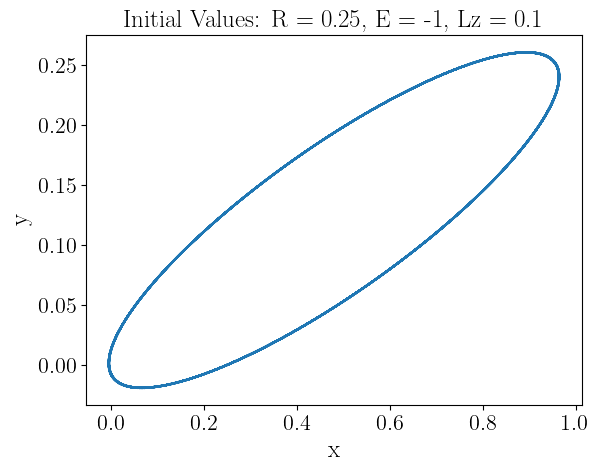

In [23]:
test_ellipse("0.25_-1_0.1_.dat")

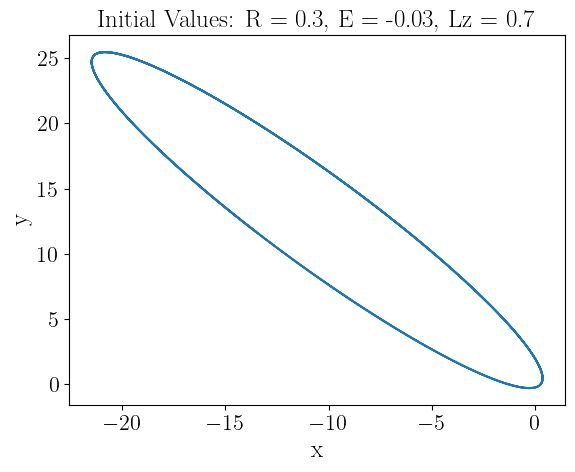

In [24]:
test_ellipse("0.3_-0.03_0.7_.dat")

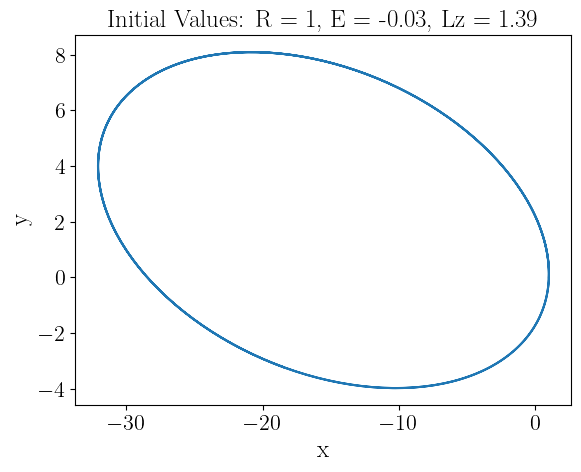

In [25]:
test_ellipse("1_-0.03_1.39_.dat")

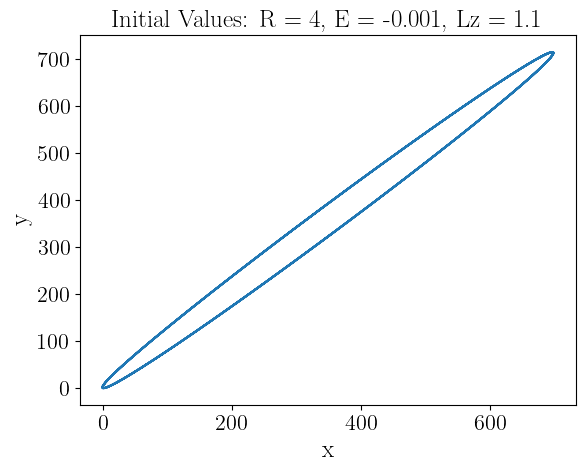

In [26]:
test_ellipse("4_-0.001_1.1_.dat")

# Part 2

2 am perihelion advance thoughts: Find minima in r(t) @ t_min, add theta_new to orbit.dat, define prec to be phi(t_min,i+1) - phi(t_min,i), report avg value.

In [35]:
import pandas as pd

In [36]:
r_phi_names = ["var", "iter", "t", "norbit", "value", "ang_freq"]
df_005 = pd.read_csv("kappa/0.05.dat", sep=" ", header=None)
df_005.columns = r_phi_names

In [37]:
df_005_r = df_005[df_005["var"] == "rad:"]
df_005_phi = df_005[df_005["var"] == "phi:"]

In [38]:
df_005_r["ang_freq"].mean()

0.5726120000000001

In [39]:
df_005_phi["ang_freq"].mean()

0.5303295833333334

In [40]:
# Find perihelion prec
min_idxs = np.array(df_005_r["iter"])
min_idxs

array([ 73740, 147480, 221219, 294959, 368699, 442439, 516179, 589919,
       663658, 737398, 811138, 884878, 958618])

In [41]:
# Indices 0:t 1-3:x 4-6:v 7:E 8-10:L 11:r 12:|L| 13:omega? 14:eccen 15-17:evect 18:phase
# out2 0:rcyl 1:vcyl

In [42]:
kappa_arr = np.loadtxt("kappa/0.050000_orbit.dat").T
phi_prec = kappa_arr[19][min_idxs // 100]
phi_prec

array([ 5.76341, 11.5268 , 17.3012 , 23.0647 , 28.8281 , 34.6025 ,
       40.3659 , 46.1403 , 51.9037 , 57.6671 , 63.4416 , 69.205  ,
       74.9794 ])

In [44]:
np.mean(np.diff(phi_prec))

5.767999166666667

In [93]:
def get_kappa_data(kappa):
    r_phi_names = ["var", "iter", "t", "norbit", "value", "ang_freq"]
    df_f = pd.read_csv("kappa/{}.dat".format(kappa), sep=" ", header=None)
    df_f.columns = r_phi_names
    df_r = df_f[df_f["var"] == "rad:"]
    df_phi = df_f[df_f["var"] == "phi:"]
    
    omega_r = df_r["ang_freq"].mean()
    omega_phi = df_phi["ang_freq"].mean()

    min_idxs = np.array(df_r["iter"])

    orbit_arr = np.loadtxt("kappa/{:.6f}_orbit.dat".format(kappa)).T
    phi_prec = orbit_arr[19][min_idxs // 100]
    print(kappa)
    print(phi_prec)

    peri_prec = np.mean(np.diff(phi_prec)) - (2 * np.pi)

    return np.array([omega_r, omega_phi, peri_prec])

In [94]:
kappa_range = [0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
kappa_plots = np.zeros(shape=(len(kappa_range),3))
for ii, kk in enumerate(kappa_range):
    kappa_plots[ii] = get_kappa_data(kk)
kappa_plots = kappa_plots.T

0.001
[ 6.26663 12.5333  18.8109  25.0775  31.3442  37.6218  43.8884  50.1551
 56.4327  62.6993  68.966   75.2436  81.5102  87.7768 ]
0.05
[ 5.76341 11.5268  17.3012  23.0647  28.8281  34.6025  40.3659  46.1403
 51.9037  57.6671  63.4416  69.205   74.9794 ]
0.1
[ 5.40944 10.8299  16.2503  21.6598  27.0802  32.5007  37.9101  43.3306
 48.751   54.1604  59.5809  65.0013 ]
0.15
[ 5.14787 10.3067  15.4656  20.6245  25.7833  30.9422  36.1011  41.2599
 46.4188  51.5777  56.7366 ]
0.2
[ 4.94875  9.90849 14.8682  19.828   24.7877  29.7475  34.7072  39.667
 44.6157  49.5755 ]
0.25
[ 4.79911  9.59822 14.3973  19.1964  23.9955  28.7946  33.5938  38.3929
 43.192  ]
0.3
[ 4.67142  9.34284 14.0143  18.6857  23.3571  28.0285  32.6999 ]
0.35
[ 4.56001  9.13102 13.691   18.262  ]


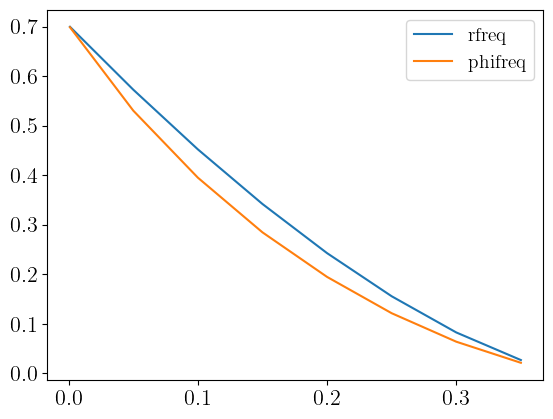

In [95]:
plt.plot(kappa_range, kappa_plots[0], label="rfreq")
plt.plot(kappa_range, kappa_plots[1], label="phifreq")
plt.legend()

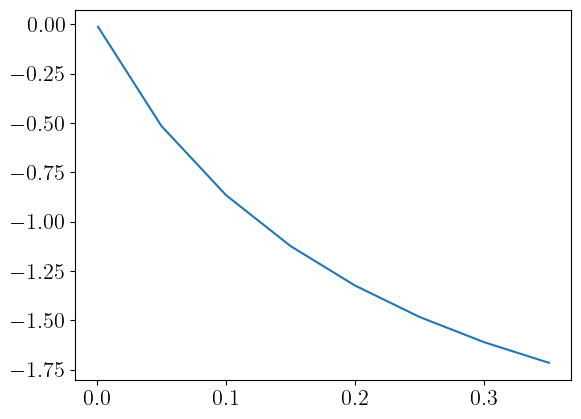

In [96]:
plt.plot(kappa_range, kappa_plots[2])